In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
data = pd.read_csv('abalone.csv',header=None,index_col=None)

In [ ]:
y = data.pop(7)
X = data

In [ ]:
ss=ShuffleSplit(n_splits=10, test_size=.20, random_state=0)
test=[]
train=[]
i = [10, 30, 100]
for j in i:
  test_accuracy,train_accuracy=[],[]
  rf = RandomForestRegressor(n_estimators=j)
  for train_index, test_index in ss.split(X):
    rf.fit(X.iloc[train_index],y.iloc[train_index])
    train_accuracy.append(r2_score(rf.predict(X.iloc[train_index])[:, np.newaxis],y.iloc[train_index]))
    y_predict=rf.predict(X.iloc[test_index])[:, np.newaxis]
    test_accuracy.append(r2_score(y_predict, y.iloc[test_index]))
  test.append(np.mean(test_accuracy))
  train.append(np.mean(train_accuracy))
    #print(train_accuracy)
    
#print(train_accuracy)

In [ ]:
print(train)
print(test)

[0.8823973412769701, 0.9063077074029977, 0.9133429759282871]
[0.21072212948184746, 0.23465686809234354, 0.23889946718754937]


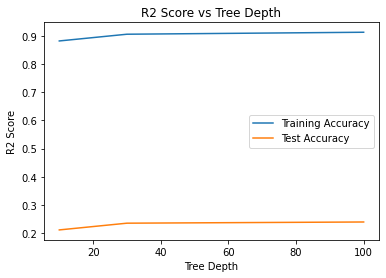

In [ ]:
plt.plot(i,train,label='Training Accuracy')
plt.plot(i,test,label='Test Accuracy')
plt.title("R2 Score vs Tree Depth")
plt.xlabel('Tree Depth')
plt.ylabel("R2 Score")
plt.legend()